In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import skew, kurtosis, norm
#from sklearn.cluster import DBSCAN, HDBSCAN
#from sklearn.preprocessing import quantile_transform
import blimpy as bl
import setigen as stg
from astropy import units as u
import psutil
%matplotlib inline

In [2]:
csv_file = '/home/cgchoza/galaxies/complete_cadences_catalog.csv'

df = pd.read_csv(csv_file)
dfl = df.iloc[np.where(df['Band'].values == 'L')[0]]

del df

In [5]:
for path in dfl['.h5 path'].values:
    if 'MESSIER081' in path:
        print(path)

/datag/pipeline/AGBT20A_999_03/collate/spliced_blc4041424344454647_guppi_58885_63646_MESSIER081_0057.rawspec.0000.h5
/datag/pipeline/AGBT20A_999_03/collate/spliced_blc4041424344454647_guppi_58885_64288_MESSIER081_0059.rawspec.0000.h5
/datag/pipeline/AGBT20A_999_03/collate/spliced_blc4041424344454647_guppi_58885_64924_MESSIER081_0061.rawspec.0000.h5


In [13]:
n_inj = 100

h5_path = '/datag/pipeline/AGBT20A_999_03/collate/spliced_blc4041424344454647_guppi_58885_63646_MESSIER081_0057.rawspec.0000.h5'

a, b, c, d = 1100, 1200, 1340, 1900
center_frequencies = np.random.uniform(a-b, d-c, n_inj)
center_frequencies += np.where(center_frequencies < 0, b, c)
drift_rates = np.random.uniform(-3.5, 3.5, n_inj)
snrs = np.random.uniform(1000, 20000, n_inj)
widths = np.random.randint(1, 4, n_inj)

wf = [bl.Waterfall(h5_path, f_start=center_frequencies[j]-0.007, f_stop=center_frequencies[j]+0.007) for j in range(n_inj)]

fb = bl.Waterfall(h5_path)
freqs, data = fb.grab_data()
header_dict = fb.header

for j in range(n_inj):
    c = stg.Frame(wf[j])
    block_freqs, _ = wf[j].grab_data()
    print(f'Adding signal {j} ...')
    c.add_signal(stg.constant_path(f_start=(center_frequencies[j])*u.MHz,
                               drift_rate=drift_rates[j]*u.Hz/u.s),
                           stg.constant_t_profile(level=c.get_intensity(snr=snrs[j])),
                           stg.sinc2_f_profile(width=widths[j]*c.df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True,
                           smearing_subsamples=15)
    data[:,np.where((freqs >= block_freqs[-1]) & (freqs <= block_freqs[0]))[0]] = np.flip(c.data, axis=1)

fb_new = bl.Waterfall(filename=None, header_dict=header_dict, data_array=np.expand_dims(data, axis=1))

fb_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M81_injections/spliced_blc4041424344454647_guppi_58885_63646_MESSIER081_0057.rawspec.0000.h5')
np.save('/datax/scratch/benjb/C23_L_M81_injections/injections_freq_DR_snr_widths_MESSIER081.npy', np.array([center_frequencies, drift_rates, snrs, widths]))

Adding signal 0 ...
Adding signal 1 ...
Adding signal 2 ...
Adding signal 3 ...
Adding signal 4 ...
Adding signal 5 ...
Adding signal 6 ...
Adding signal 7 ...
Adding signal 8 ...
Adding signal 9 ...
Adding signal 10 ...
Adding signal 11 ...
Adding signal 12 ...
Adding signal 13 ...
Adding signal 14 ...
Adding signal 15 ...
Adding signal 16 ...
Adding signal 17 ...
Adding signal 18 ...
Adding signal 19 ...
Adding signal 20 ...
Adding signal 21 ...
Adding signal 22 ...
Adding signal 23 ...
Adding signal 24 ...
Adding signal 25 ...
Adding signal 26 ...
Adding signal 27 ...
Adding signal 28 ...
Adding signal 29 ...
Adding signal 30 ...
Adding signal 31 ...
Adding signal 32 ...
Adding signal 33 ...
Adding signal 34 ...
Adding signal 35 ...
Adding signal 36 ...
Adding signal 37 ...
Adding signal 38 ...
Adding signal 39 ...
Adding signal 40 ...
Adding signal 41 ...
Adding signal 42 ...
Adding signal 43 ...
Adding signal 44 ...
Adding signal 45 ...
Adding signal 46 ...
Adding signal 47 ...
Ad

In [14]:
fb_new.info()


--- File Info ---
DIMENSION_LABELS : [b'time' b'feed_id' b'frequency']
        az_start :                              0.0
       data_type :                                1
            fch1 :                2251.46484375 MHz
            foff :      -2.7939677238464355e-06 MHz
      machine_id :                               20
           nbits :                               32
          nchans :                        536870912
            nifs :                                1
     source_name :                       MESSIER081
         src_dej :                       69:03:55.8
         src_raj :                      9:55:33.192
    telescope_id :                                6
           tsamp :               18.253611007999982
   tstart (ISOT) :          2020-02-06T17:40:46.000
    tstart (MJD) :                58885.73664351852
        za_start :                              0.0

Num ints in file :                               16
      File shape :                         

In [15]:
536870912/8

67108864.0

In [2]:
n_inj = 25

h5_list = ['/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
            '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
            '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
            '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
            '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
            '/datag/pipeline/AGBT19B_999_121/blc72_blp02/blc72_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

print(f'Starting blc72 injection ...')
center_frequencies = np.random.uniform(1690, 1875, n_inj)
drift_rates = np.random.uniform(-3, 3, n_inj)
snrs = np.random.uniform(1000, 10000, n_inj)

print(f'Reading Waterfalls ...')
wf = [[bl.Waterfall(h5_list[i], f_start=center_frequencies[j]-0.006, f_stop=center_frequencies[j]+0.006) for i in range(6)] for j in range(n_inj)]
#wf = [bl.Waterfall(h5_list[i]) for i in range(6)]

print('Beginning Frame construction ...')

frame_list = []
for j in range(n_inj):
    cadence_frame_list = []
    for i in range(6):
        cadence_frame_list.append(stg.Frame(waterfall=wf[j][i]))
    frame_list.append(cadence_frame_list)

fb0 = bl.Waterfall(h5_list[0])
fb2 = bl.Waterfall(h5_list[2])
fb4 = bl.Waterfall(h5_list[4])
freqs0, data0 = fb0.grab_data()
header_dict0 = fb0.header
freqs2, data2 = fb2.grab_data()
header_dict2 = fb2.header
freqs4, data4 = fb4.grab_data()
header_dict4 = fb4.header

for j in range(n_inj):
    c = stg.Cadence(frame_list[j])
    block_freqs, _ = wf[j][0].grab_data()
    print(f'Adding signal {j} ...')
    c.add_signal(stg.constant_path(f_start=(center_frequencies[j])*u.MHz,
                               drift_rate=drift_rates[j]*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=snrs[j])),
                           stg.sinc2_f_profile(width=1*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True,
                           smearing_subsamples=15)
    data0[:,np.where((freqs0 >= block_freqs[-1]) & (freqs0 <= block_freqs[0]))[0]] = c[0].data
    data2[:,np.where((freqs2 >= block_freqs[-1]) & (freqs2 <= block_freqs[0]))[0]] = c[2].data
    data4[:,np.where((freqs4 >= block_freqs[-1]) & (freqs4 <= block_freqs[0]))[0]] = c[4].data

fb0_new = bl.Waterfall(filename=None, header_dict=header_dict0, data_array=np.expand_dims(data0, axis=1))
fb2_new = bl.Waterfall(filename=None, header_dict=header_dict2, data_array=np.expand_dims(data2, axis=1))
fb4_new = bl.Waterfall(filename=None, header_dict=header_dict4, data_array=np.expand_dims(data4, axis=1))

fb0_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5')
fb2_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5')
fb4_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5')
np.save('/datax/scratch/benjb/C23_L_M31_injections/injections_freq_DR_snr_MESSIER031_blc72.npy', np.array([center_frequencies, drift_rates, snrs]))

Starting blc72 injection ...
Reading Waterfalls ...
Beginning Frame construction ...
Adding signal 0 ...
Adding signal 1 ...
Adding signal 2 ...
Adding signal 3 ...
Adding signal 4 ...
Adding signal 5 ...
Adding signal 6 ...
Adding signal 7 ...
Adding signal 8 ...
Adding signal 9 ...
Adding signal 10 ...
Adding signal 11 ...
Adding signal 12 ...
Adding signal 13 ...
Adding signal 14 ...
Adding signal 15 ...
Adding signal 16 ...
Adding signal 17 ...
Adding signal 18 ...
Adding signal 19 ...
Adding signal 20 ...
Adding signal 21 ...
Adding signal 22 ...
Adding signal 23 ...
Adding signal 24 ...
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5 without blobbing.
blimpy.waterfall INFO     Conversion time: 5.18sec
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc72_guppi_58832_16851_MESSIER

In [4]:
n_inj = 25

h5_list = ['/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc73_blp03/blc73_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

print(f'Starting blc73 injection ...')
center_frequencies = np.random.uniform(1502, 1688, n_inj)
drift_rates = np.random.uniform(-3, 3, n_inj)
snrs = np.random.uniform(1000, 10000, n_inj)

print(f'Reading Waterfalls ...')
wf = [[bl.Waterfall(h5_list[i], f_start=center_frequencies[j]-0.006, f_stop=center_frequencies[j]+0.006) for i in range(6)] for j in range(n_inj)]
#wf = [bl.Waterfall(h5_list[i]) for i in range(6)]

print('Beginning Frame construction ...')

frame_list = []
for j in range(n_inj):
    cadence_frame_list = []
    for i in range(6):
        cadence_frame_list.append(stg.Frame(waterfall=wf[j][i]))
    frame_list.append(cadence_frame_list)

fb0 = bl.Waterfall(h5_list[0])
fb2 = bl.Waterfall(h5_list[2])
fb4 = bl.Waterfall(h5_list[4])
freqs0, data0 = fb0.grab_data()
header_dict0 = fb0.header
freqs2, data2 = fb2.grab_data()
header_dict2 = fb2.header
freqs4, data4 = fb4.grab_data()
header_dict4 = fb4.header

for j in range(n_inj):
    c = stg.Cadence(frame_list[j])
    block_freqs, _ = wf[j][0].grab_data()
    print(f'Adding signal {j} ...')
    c.add_signal(stg.constant_path(f_start=(center_frequencies[j])*u.MHz,
                               drift_rate=drift_rates[j]*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=snrs[j])),
                           stg.sinc2_f_profile(width=1*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True,
                           smearing_subsamples=15)
    data0[:,np.where((freqs0 >= block_freqs[-1]) & (freqs0 <= block_freqs[0]))[0]] = c[0].data
    data2[:,np.where((freqs2 >= block_freqs[-1]) & (freqs2 <= block_freqs[0]))[0]] = c[2].data
    data4[:,np.where((freqs4 >= block_freqs[-1]) & (freqs4 <= block_freqs[0]))[0]] = c[4].data

fb0_new = bl.Waterfall(filename=None, header_dict=header_dict0, data_array=np.expand_dims(data0, axis=1))
fb2_new = bl.Waterfall(filename=None, header_dict=header_dict2, data_array=np.expand_dims(data2, axis=1))
fb4_new = bl.Waterfall(filename=None, header_dict=header_dict4, data_array=np.expand_dims(data4, axis=1))

fb0_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5')
fb2_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5')
fb4_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5')
np.save('/datax/scratch/benjb/C23_L_M31_injections/injections_freq_DR_snr_MESSIER031_blc73.npy', np.array([center_frequencies, drift_rates, snrs]))

Starting blc73 injection ...
Reading Waterfalls ...
Beginning Frame construction ...
Adding signal 0 ...
Adding signal 1 ...
Adding signal 2 ...
Adding signal 3 ...
Adding signal 4 ...
Adding signal 5 ...
Adding signal 6 ...
Adding signal 7 ...
Adding signal 8 ...
Adding signal 9 ...
Adding signal 10 ...
Adding signal 11 ...
Adding signal 12 ...
Adding signal 13 ...
Adding signal 14 ...
Adding signal 15 ...
Adding signal 16 ...
Adding signal 17 ...
Adding signal 18 ...
Adding signal 19 ...
Adding signal 20 ...
Adding signal 21 ...
Adding signal 22 ...
Adding signal 23 ...
Adding signal 24 ...
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5 without blobbing.
blimpy.waterfall INFO     Conversion time: 5.66sec
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc73_guppi_58832_16851_MESSIER

In [3]:
n_inj = 25

h5_list = ['/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc74_blp04/blc74_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

print(f'Starting blc74 injection ...')
center_frequencies = np.random.uniform(1350, 1500, n_inj)
drift_rates = np.random.uniform(-3, 3, n_inj)
snrs = np.random.uniform(1000, 10000, n_inj)

print(f'Reading Waterfalls ...')
wf = [[bl.Waterfall(h5_list[i], f_start=center_frequencies[j]-0.006, f_stop=center_frequencies[j]+0.006) for i in range(6)] for j in range(n_inj)]
#wf = [bl.Waterfall(h5_list[i]) for i in range(6)]

print('Beginning Frame construction ...')

frame_list = []
for j in range(n_inj):
    cadence_frame_list = []
    for i in range(6):
        cadence_frame_list.append(stg.Frame(waterfall=wf[j][i]))
    frame_list.append(cadence_frame_list)

fb0 = bl.Waterfall(h5_list[0])
fb2 = bl.Waterfall(h5_list[2])
fb4 = bl.Waterfall(h5_list[4])
freqs0, data0 = fb0.grab_data()
header_dict0 = fb0.header
freqs2, data2 = fb2.grab_data()
header_dict2 = fb2.header
freqs4, data4 = fb4.grab_data()
header_dict4 = fb4.header

for j in range(n_inj):
    c = stg.Cadence(frame_list[j])
    block_freqs, _ = wf[j][0].grab_data()
    print(f'Adding signal {j} ...')
    c.add_signal(stg.constant_path(f_start=(center_frequencies[j])*u.MHz,
                               drift_rate=drift_rates[j]*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=snrs[j])),
                           stg.sinc2_f_profile(width=1*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True,
                           smearing_subsamples=15)
    data0[:,np.where((freqs0 >= block_freqs[-1]) & (freqs0 <= block_freqs[0]))[0]] = c[0].data
    data2[:,np.where((freqs2 >= block_freqs[-1]) & (freqs2 <= block_freqs[0]))[0]] = c[2].data
    data4[:,np.where((freqs4 >= block_freqs[-1]) & (freqs4 <= block_freqs[0]))[0]] = c[4].data

fb0_new = bl.Waterfall(filename=None, header_dict=header_dict0, data_array=np.expand_dims(data0, axis=1))
fb2_new = bl.Waterfall(filename=None, header_dict=header_dict2, data_array=np.expand_dims(data2, axis=1))
fb4_new = bl.Waterfall(filename=None, header_dict=header_dict4, data_array=np.expand_dims(data4, axis=1))

fb0_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5')
fb2_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5')
fb4_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5')
np.save('/datax/scratch/benjb/C23_L_M31_injections/injections_freq_DR_snr_MESSIER031_blc74.npy', np.array([center_frequencies, drift_rates, snrs]))

Starting blc74 injection ...
Reading Waterfalls ...
Beginning Frame construction ...
Adding signal 0 ...
Adding signal 1 ...
Adding signal 2 ...
Adding signal 3 ...
Adding signal 4 ...
Adding signal 5 ...
Adding signal 6 ...
Adding signal 7 ...
Adding signal 8 ...
Adding signal 9 ...
Adding signal 10 ...
Adding signal 11 ...
Adding signal 12 ...
Adding signal 13 ...
Adding signal 14 ...
Adding signal 15 ...
Adding signal 16 ...
Adding signal 17 ...
Adding signal 18 ...
Adding signal 19 ...
Adding signal 20 ...
Adding signal 21 ...
Adding signal 22 ...
Adding signal 23 ...
Adding signal 24 ...
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5 without blobbing.
blimpy.waterfall INFO     Conversion time: 5.23sec
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16851_MESSIER

In [11]:
arr = np.load('/datax/scratch/benjb/C23_L_M31_injections/injections_freq_DR_snr_MESSIER031_blc74.npy')
freqs = arr[0]
drifts = arr[1]
snrs = arr[2]

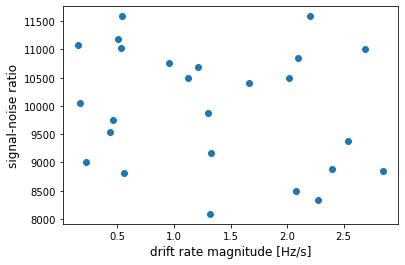

In [13]:
plt.scatter(np.abs(drifts), snrs)
plt.scatter(np.abs(unfound_drifts), unfound_snrs)
plt.xlabel('drift rate magnitude [Hz/s]', size=12)
plt.ylabel('signal-noise ratio', size=12)
plt.show()

In [15]:
arr = np.load('/datax/scratch/benjb/C23_L_M31_injections/injections_freq_DR_snr_MESSIER031_blc75.npy')
freqs = arr[0]
drifts = arr[1]
snrs = arr[2]
df = pd.read_table('/datax/scratch/benjb/C23_L_M31_injections/blc75_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.dat', sep='\s+', names=['Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency','Corrected_Frequency',
                                            'Index', 'freq_start', 'freq_end', 'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 
                                            'Full_number_of_hits'], skiprows=9)
table_freqs = df['Uncorrected_Frequency'].values
table_drifts = df['Drift_Rate'].values
table_snrs = df['SNR'].values
unfound_drifts = []
unfound_snrs = []
for i in range(len(freqs)):
    vec = np.round(table_freqs - freqs[i], 2)
    if not 0 in vec:
        unfound_drifts.append(drifts[i])
        unfound_snrs.append(snrs[i])
        print(freqs[i])

In [3]:
for i in range(25):
    print(f'{drift_rates[i]}  {snrs[i]}  {center_frequencies[i]}')

3.784742496639569  942.3667311378543  1403.1575964082876
-3.767661987583101  797.496662136072  1451.0507921543779
0.5905499541232375  744.784316714916  1469.8790439244308
1.0579756008211003  476.3258819442047  1435.8796305136584
-3.3879605246631135  811.6478475291213  1483.2020127754529
0.004965112118978432  115.2328186176838  1383.574217881804
-1.6512994494799704  899.2551784183346  1407.6570411041446
3.07342624112563  550.1252225868046  1369.7997881843173
3.6641927352271884  931.9478162187897  1373.6018676089761
-3.5677575411335587  104.13976826585227  1370.0987287273426
1.265354892109074  367.68626739404175  1397.0794941760605
-1.605661004722613  606.6180940486056  1350.562440406484
-0.35934616430432254  104.42134521952306  1371.8294601029052
3.164914737296461  894.7431641051128  1452.1441769358528
-2.7064894390755674  500.663350692783  1428.3817968401586
2.831378395563929  263.20129649003024  1374.6865828544508
-3.167750115105486  341.75587339582773  1494.511612708353
-3.3368370397

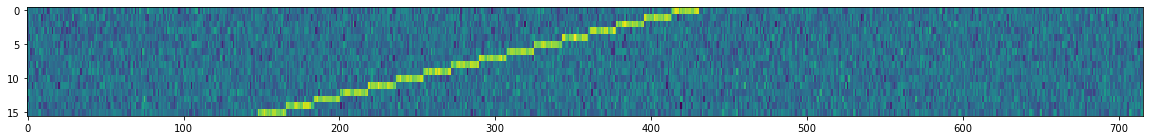

In [5]:
fb = bl.Waterfall('/datax/scratch/benjb/C23_L_M31_injections/blc74_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
                  f_start=1428.381, f_stop=1428.383)
fig = plt.figure(figsize=(20, 2))
plt.imshow(np.log10(np.squeeze(fb.data))**2, aspect='auto', interpolation='none')

In [14]:
n_inj = 25

h5_list = ['/datag/pipeline/AGBT19B_999_121/blc75_blp05/blc75_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc75_blp05/blc75_guppi_58832_16530_HIP2792_0058.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc75_blp05/blc75_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc75_blp05/blc75_guppi_58832_17168_HIP3077_0060.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc75_blp05/blc75_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5',
       '/datag/pipeline/AGBT19B_999_121/blc75_blp05/blc75_guppi_58832_17801_HIP3223_0062.gpuspec.0000.h5']

print(f'Starting blc75 injection ...')
center_frequencies = np.random.uniform(1127, 1199, n_inj)
drift_rates = np.random.uniform(-3, 3, n_inj)
snrs = np.random.uniform(1000, 10000, n_inj)

print(f'Reading Waterfalls ...')
wf = [[bl.Waterfall(h5_list[i], f_start=center_frequencies[j]-0.006, f_stop=center_frequencies[j]+0.006) for i in range(6)] for j in range(n_inj)]
#wf = [bl.Waterfall(h5_list[i]) for i in range(6)]

print('Beginning Frame construction ...')

frame_list = []
for j in range(n_inj):
    cadence_frame_list = []
    for i in range(6):
        cadence_frame_list.append(stg.Frame(waterfall=wf[j][i]))
    frame_list.append(cadence_frame_list)

fb0 = bl.Waterfall(h5_list[0])
fb2 = bl.Waterfall(h5_list[2])
fb4 = bl.Waterfall(h5_list[4])
freqs0, data0 = fb0.grab_data()
header_dict0 = fb0.header
freqs2, data2 = fb2.grab_data()
header_dict2 = fb2.header
freqs4, data4 = fb4.grab_data()
header_dict4 = fb4.header

for j in range(n_inj):
    c = stg.Cadence(frame_list[j])
    block_freqs, _ = wf[j][0].grab_data()
    print(f'Adding signal {j} ...')
    c.add_signal(stg.constant_path(f_start=(center_frequencies[j])*u.MHz,
                               drift_rate=drift_rates[j]*u.Hz/u.s),
                           stg.constant_t_profile(level=c[0].get_intensity(snr=snrs[j])),
                           stg.sinc2_f_profile(width=1*c[0].df*u.Hz),
                           stg.constant_bp_profile(level=1),
                           doppler_smearing=True,
                           smearing_subsamples=15)
    data0[:,np.where((freqs0 >= block_freqs[-1]) & (freqs0 <= block_freqs[0]))[0]] = c[0].data
    data2[:,np.where((freqs2 >= block_freqs[-1]) & (freqs2 <= block_freqs[0]))[0]] = c[2].data
    data4[:,np.where((freqs4 >= block_freqs[-1]) & (freqs4 <= block_freqs[0]))[0]] = c[4].data

fb0_new = bl.Waterfall(filename=None, header_dict=header_dict0, data_array=np.expand_dims(data0, axis=1))
fb2_new = bl.Waterfall(filename=None, header_dict=header_dict2, data_array=np.expand_dims(data2, axis=1))
fb4_new = bl.Waterfall(filename=None, header_dict=header_dict4, data_array=np.expand_dims(data4, axis=1))

fb0_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc75_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5')
fb2_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc75_guppi_58832_16851_MESSIER031_0059.gpuspec.0000.h5')
fb4_new.write_to_hdf5('/datax/scratch/benjb/C23_L_M31_injections/blc75_guppi_58832_17485_MESSIER031_0061.gpuspec.0000.h5')
np.save('/datax/scratch/benjb/C23_L_M31_injections/injections_freq_DR_snr_MESSIER031_blc75.npy', np.array([center_frequencies, drift_rates, snrs]))

Starting blc75 injection ...
Reading Waterfalls ...
Beginning Frame construction ...
Adding signal 0 ...
Adding signal 1 ...
Adding signal 2 ...
Adding signal 3 ...
Adding signal 4 ...
Adding signal 5 ...
Adding signal 6 ...
Adding signal 7 ...
Adding signal 8 ...
Adding signal 9 ...
Adding signal 10 ...
Adding signal 11 ...
Adding signal 12 ...
Adding signal 13 ...
Adding signal 14 ...
Adding signal 15 ...
Adding signal 16 ...
Adding signal 17 ...
Adding signal 18 ...
Adding signal 19 ...
Adding signal 20 ...
Adding signal 21 ...
Adding signal 22 ...
Adding signal 23 ...
Adding signal 24 ...
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc75_guppi_58832_16209_MESSIER031_0057.gpuspec.0000.h5 without blobbing.
blimpy.waterfall INFO     Conversion time: 5.02sec
blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for /datax/scratch/benjb/C23_L_M31_injections/blc75_guppi_58832_16851_MESSIER